In [52]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

In [53]:
n_cells = (2, 3)
coupling = [1,1,1]

qubits = n_cells[0] * n_cells[1]

lattice = 'triangle'

H = qml.spin.heisenberg(lattice, n_cells, coupling, boundary_condition=True)

In [54]:
eigenvalues = np.linalg.eigvalsh(H.matrix())
eigenvalues[0]

np.float64(-9.000000000000007)

## Load data

In [55]:
loc = "../local_data/log5"
types = 'crx'

In [56]:
energies_hee = np.load(loc + '/energies_' + types + '_1.npy')
convergences_hee = np.load(loc + '/convergences_' + types + '_1.npy')
grads_hee = np.load(loc + '/grad_norms_' + types + '_1.npy')
grad_variances_hee = np.load(loc + '/grad_variances_' + types + '_1.npy')

In [57]:
energies_ng = np.load(loc + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc + '/grad_variances_' + types + '_2.npy')

In [58]:
energies_ng.shape

(7, 100, 201)

## Plots


In [59]:
mean_loss_hee = np.mean(energies_hee, axis=1)
mean_loss_ng = np.mean(energies_ng, axis=1)

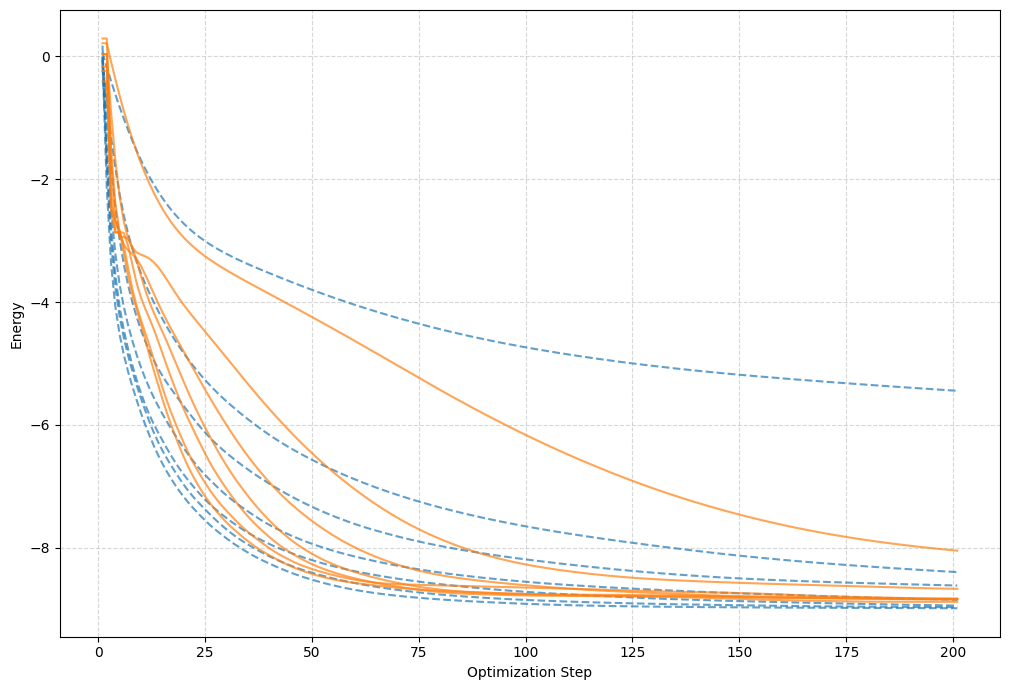

In [60]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_loss_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_loss_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={2*(i+1)}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [61]:
layers = np.arange(2, 27, 4)

In [62]:
min_hee = np.min(energies_hee[:,:,-1], axis=1)
min_ng = np.min(energies_ng[:,:,-1], axis=1)

In [63]:
min_hee

array([-6.23688691, -8.94240802, -8.9879171 , -8.9877938 , -8.98974079,
       -8.9907557 , -8.9949648 ])

In [64]:
min_ng

array([-8.99906731, -8.99995613, -8.99987698, -8.99986744, -8.99992657,
       -8.99994469, -8.99996662])

In [72]:
min_hee

array([-6.23688691, -8.94240802, -8.9879171 , -8.9877938 , -8.98974079,
       -8.9907557 , -8.9949648 ])

In [65]:
min_ng[-1]/9

np.float64(-0.9999962912665473)

In [66]:
min_hee[-1]/9

np.float64(-0.9994405338508368)

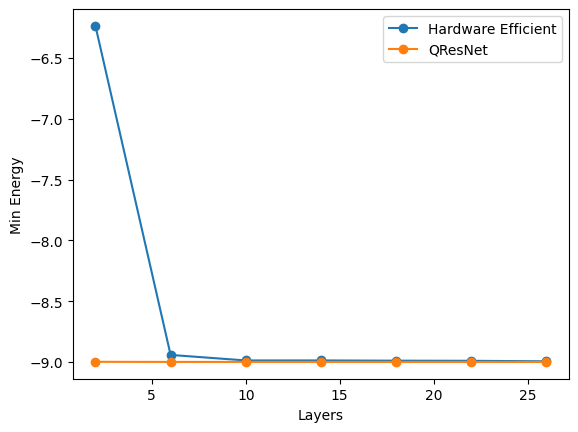

In [67]:
plt.plot(layers, min_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [68]:
median_hee = np.median(energies_hee, axis=1)[:,-1]
median_ng = np.median(energies_ng, axis=1)[:,-1]

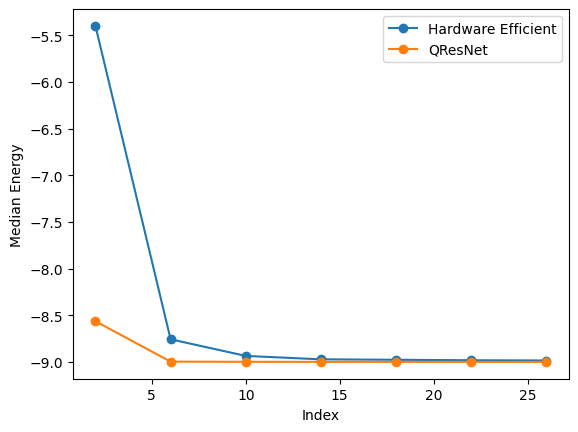

In [69]:
plt.plot(layers, median_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()

In [70]:
mean_var_hee = np.mean(grad_variances_hee, axis=1)
mean_var_ng = np.mean(grad_variances_ng, axis=1)

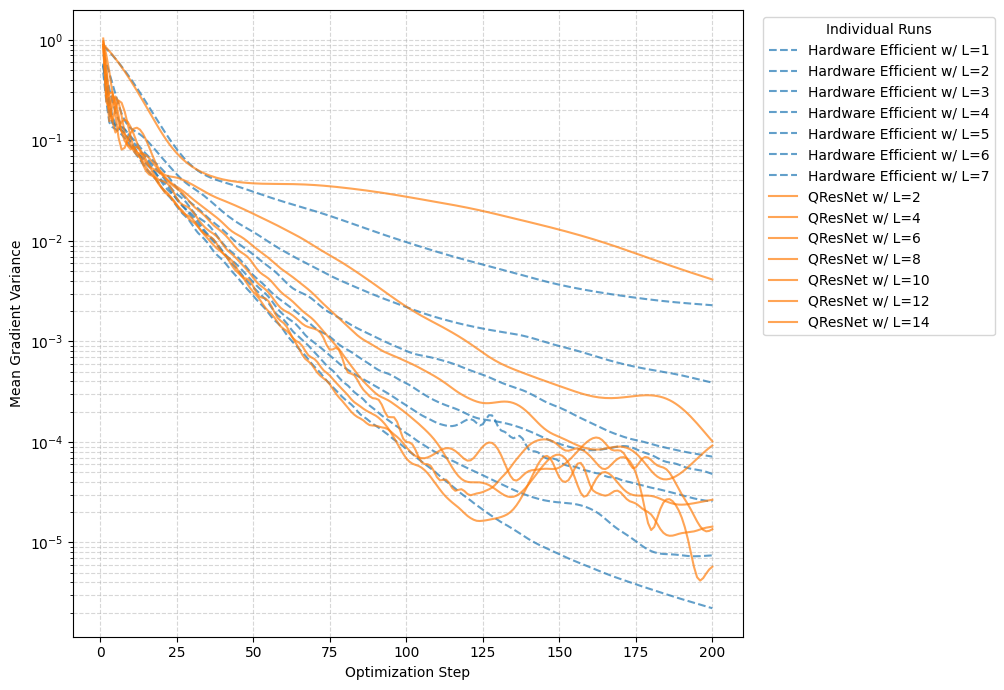

In [71]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps = np.arange(1, mean_var_hee.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_var_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={i+1}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_var_ng):
    plt.plot(steps, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.yscale('log')
plt.xlabel('Optimization Step')
plt.ylabel('Mean Gradient Variance')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()